###  Bộ dữ liệu Online Retail mô tả tình hình kinh doanh của một doanh nghiệp bán hàng Online mà bạn đã được làm quen từ buổi 1
### Yêu cầu:

### 1. Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [1]:
## Gọi dữ liệu
import pandas as pd
import numpy as np
df = pd.read_csv('OnlineRetail.csv', encoding = 'ISO-8859-1')

In [2]:
## Kiểm tra dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### 2. Có nên xoá hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao

In [4]:
df[(df['Description'].isna() == True) & (df['CustomerID'].isna() == True)]
## lọc ra các dòng chứa giá trị khuyết thiếu

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [5]:
# Lượng dữ liệu 1454 bị thiếu khá nhỏ so với dữ liệu thực tế, có thể xoá được

In [6]:
df1 = df.dropna(subset = 'Description')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      540455 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


### 3. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định : "Không biết"

In [7]:
values = {'Description':'Không biết','CustomerID':'Guest'} # thay luôn customerID na = guest
df2 = df.fillna(value = values)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


### 4. Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

In [8]:
## Quantity có một số giá trị là âm, đầu tiên cần loại bỏ các giá trị này

In [9]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.histplot(df2['Quantity'])

#plt.hist(df2['Quantity'], bins = 100)
#plt.show()

In [26]:
# loại bỏ giá trị âm
df3 = df2.loc[df2.loc[:,'Quantity']>0,:]
df4 = df3.loc[df2.loc[:,'UnitPrice']> 0,:]
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<AxesSubplot:xlabel='Quantity'>

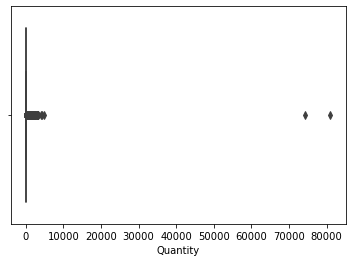

In [30]:
import seaborn as sns
sns.boxplot(x = df4['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

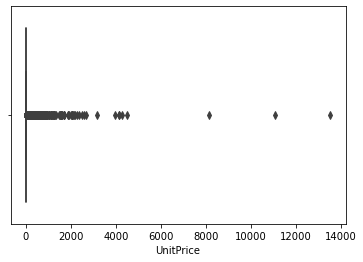

In [31]:
sns.boxplot(x = df4['UnitPrice'])

In [34]:
# loại bỏ giá trị lớn bất thường
df5 = df4.loc[df2.loc[:,'Quantity']<10000,:]
df6 = df5.loc[df2.loc[:,'UnitPrice']<6000,:]
df6

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<AxesSubplot:xlabel='UnitPrice'>

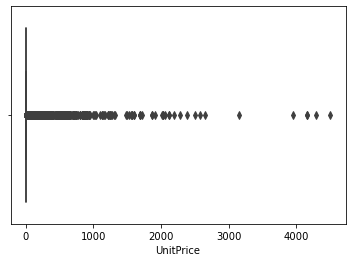

In [41]:
sns.boxplot(x = df6['UnitPrice'])

<AxesSubplot:xlabel='Quantity'>

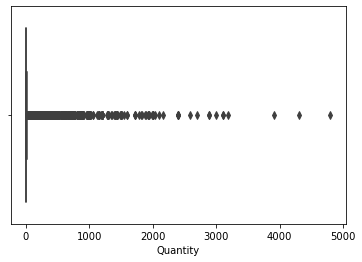

In [42]:
sns.boxplot(x = df6['Quantity'])

In [13]:
# Vẫn còn các giá trị bất thường, dùng IQR loại bỏ

In [ ]:
### Quantity

In [37]:
Q1 = df4['Quantity'].quantile(0.25)
Q3 = df4['Quantity'].quantile(0.74)
IQR = Q3 - Q1
print(IQR)

9.0


In [38]:
GHT = Q1 - 1.5 * IQR
GHD = Q3 + 1.5 * IQR
print('Giới hạn trên', GHT)
print('Giới hạn dưới',GHD)

Giới hạn trên -12.5
Giới hạn dưới 23.5


In [40]:
df7 = df6.loc[(df6.loc[:,'Quantity']>GHT)&(df6.loc[:,'Quantity']<GHD)]
df7

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<AxesSubplot:xlabel='Quantity'>

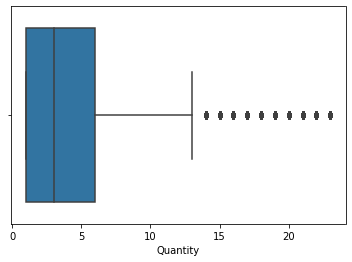

In [53]:
sns.boxplot(x = df7['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

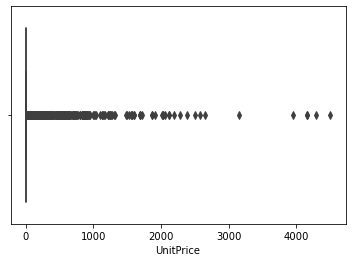

In [44]:
sns.boxplot(x = df7['UnitPrice'])
### UnitPrice cũng cần loại bỏ

In [45]:
Q1 = df7['UnitPrice'].quantile(0.25)
Q3 = df7['UnitPrice'].quantile(0.74)
IQR = Q3 - Q1
print(IQR)

2.88


In [57]:
GHD = Q1 - 1.5 * IQR
GHT = Q3 + 1.5 * IQR
print('Giới hạn trên', GHT)
print('Giới hạn dưới',GHD)

Giới hạn trên 8.45
Giới hạn dưới -3.0700000000000003


In [59]:
df8 = df7.loc[(df7.loc[:,'UnitPrice']<GHT)&(df7.loc[:,'UnitPrice']>GHD)]
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<AxesSubplot:xlabel='UnitPrice'>

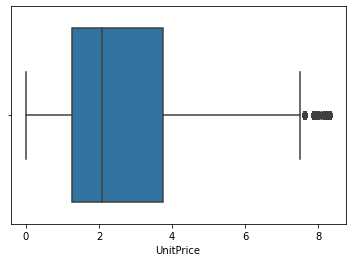

In [60]:
sns.boxplot(x = df8['UnitPrice'])

### 5. Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch

In [49]:
### Dữ liệu sạch
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
### Sau khi loại bỏ ngoại lai, dữ liệu còn hơn 40000 vẫn đủ lớn để ptich

### 6. Mô tả thông tin của bộ dữ liệu trên và nhận xét

<AxesSubplot:xlabel='UnitPrice'>

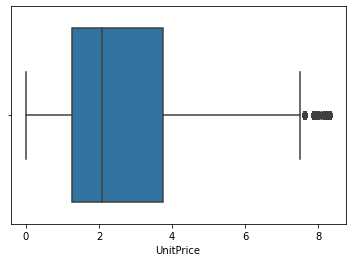

In [51]:
sns.boxplot(x = df8['UnitPrice'])

+ Có 50% giá cổ phiếu lớn hơn 2
+ Phần dữ liệu này là do có một số cổ phiếu có giá trị cao bất thường
+ Có 75% giá cổ phiếu nhỏ hơn 4
+ có một cá biệt giá cổ phiếu lớn ở bên phải.

<AxesSubplot:xlabel='Quantity'>

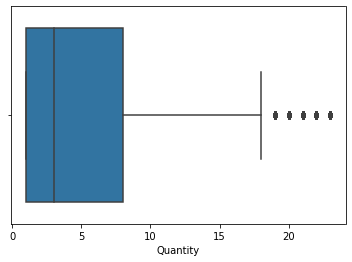

In [56]:
sns.boxplot(x = df8['Quantity'])

+ Dữ liệu xu hướng lệch phải
+ Có 50% lượng mua lớn hơn 4
+ Cá biệt có một số lượng mua cổ phiếu cực kì lớn